In [15]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum, compute_scalar_energy_spectrum_numba # type: ignore

### 1D

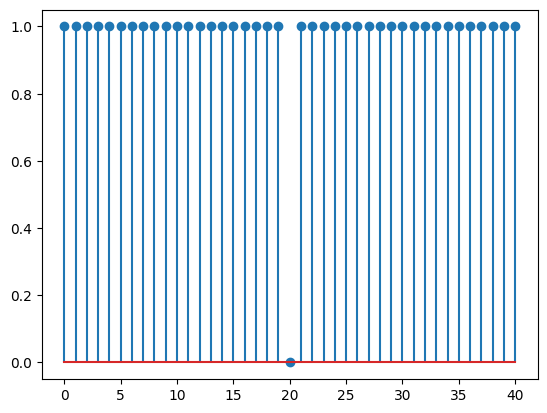

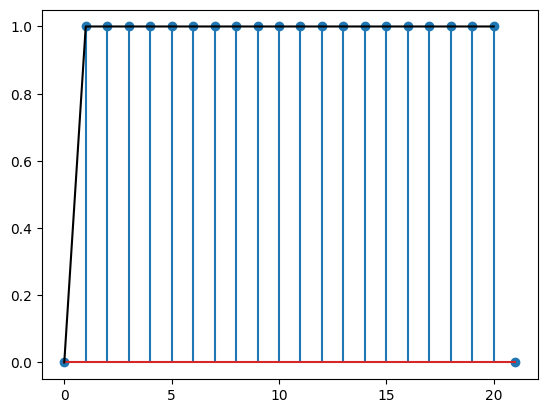

In [16]:
N = 20
ek_u = [1] * N
ek_u = np.array(ek_u[::-1] + [0] + ek_u)
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(
    ek_u=ek_u, debug=False
)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

21


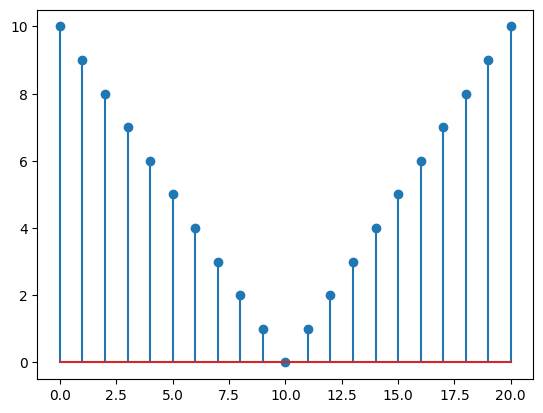

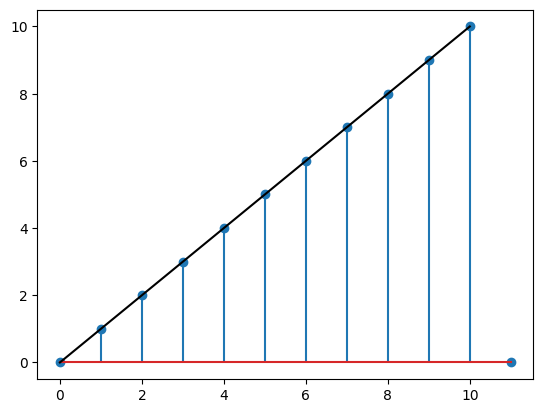

In [17]:
N = 10
ek_u = list(np.arange(N)+1)
ek_u = ek_u[::-1] + [0] + ek_u
ek_u = np.array(ek_u)
print(len(ek_u))
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(ek_u)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

### 2D

Text(0.5, 1.0, '$\\sin(2\\pi x) + \\sin(2\\pi y)$')

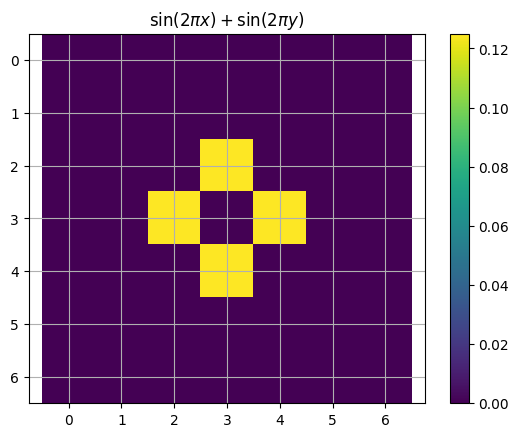

In [44]:
sr = 7
twopi = 2 * np.pi
cos, sin = np.cos, np.sin
x = y = np.arange(0, 1., 1. / sr)
X, Y = np.meshgrid(x, y)

u = sin(twopi * X)
u = sin(twopi * X)*sin(twopi * Y)
u = sin(twopi * X) + sin(twopi * Y)
# u = sin(twopi * X)*sin(twopi * X) + cos(2*twopi * Y)

U0 = 1.

# When
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=None, U0=U0, debug=True
    )
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')
plt.grid()
plt.title(r'$\sin(2\pi x)$')
plt.title(r'$\sin(2\pi x)\sin(2\pi y)$')
plt.title(r'$\sin(2\pi x) + \sin(2\pi y)$')

In [19]:
tol = 1e-12
ind = np.where(np.abs(u_spectrum - 0.5) < tol)
ind, np.max(u_spectrum)

((array([ 0,  0,  2, 28], dtype=int64), array([ 1, 29,  0,  0], dtype=int64)),
 0.5)

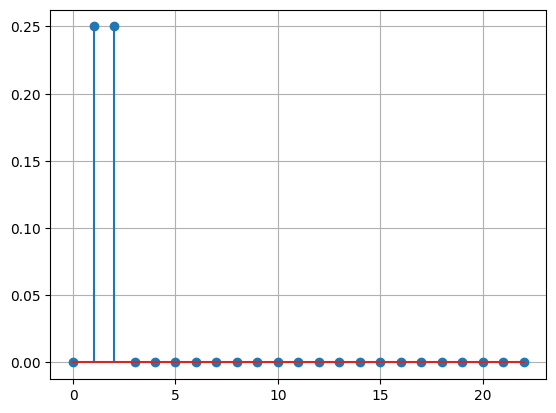

In [20]:
k, ek = compute_scalar_energy_spectrum(ek_u, ek_v)
plt.stem(ek)
plt.grid()

In [ ]:
def mirror_data(q1):
    q2 = np.fliplr(q1)
    q3 = np.flipud(q1)
    q4 = np.flipud(q2)
    Q = np.vstack((np.hstack((q1, q2)), np.hstack((q3, q4))))
    return Q

In [ ]:
# Create data for first quadrant
ek_u = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')

In [ ]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, debug=True)
print(len(k))

In [ ]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

In [ ]:
# Create meshgrid of 10X10 points
x = y = np.arange(-1, 1., 1. / 50)
X, Y = np.meshgrid(x, y)

# Create a circle
r = 0.5
u = np.sqrt((X)**2 + (Y )**2) < r
plt.imshow(u)

In [ ]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(u, u, debug=True)

In [ ]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

### 3D

In [ ]:
sr = 30
x = y = z = np.arange(0, 1., 1. / sr)
X, Y, Z = np.meshgrid(x, y, z)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y) +\
    np.sin(2 * np.pi * 3 * Z)
U0 = 0.5
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=u, U0=U0, debug=True
    )

In [ ]:
tol = 1e-10
ind = np.where(np.abs(u_spectrum - 1.) < tol)
ind, np.max(ek_u)

In [ ]:
ek_u = np.array([
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
])
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, ek_u, debug=True)
print(len(k))

In [ ]:
plt.plot(ek_u_sphere)
plt.stem(ek_u_sphere)
plt.grid()
np.round(ek_u_sphere)

### Scipy vs Numpy FFTm

In [ ]:
from numpy.fft import fftn as fftn_numpy
from scipy.fft import fftn as fftn_scipy
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Sampling rate
sr = 5000

# Time vector
t = np.arange(0, 1., 1. / sr)

# Signal
f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x = np.zeros(len(t))
for i in range(len(f)):
    x += a[i] * np.sin(2 * np.pi * f[i] * t)

# FFT - Numpy
X_numpy = fftn_numpy(x)
X_numpy = np.abs(X_numpy)

# FFT - Scipy
X_scipy = fftn_scipy(x)
X_scipy = np.abs(X_scipy)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.subplot(132)
plt.loglog(X_numpy, 'r', label='Numpy')
plt.loglog(X_scipy, 'b', label='Scipy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.legend()
plt.subplot(133)
# Plot error
plt.loglog(np.abs(X_numpy - X_scipy), 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Error')

plt.tight_layout()
plt.axis('equal')

In [ ]:
# Plot Computation Time of numpy and scipy fftn
N_run = 10
t_numpy = []
t_scipy = []
N_array = np.arange(10, 15) #np.arange(10, 25)
N_array = 2**N_array
for n, N in enumerate(N_array):
    if n % 5 == 0:
        print(n)
    x0 = np.random.rand(N)
    t0 = time.time()
    for i in range(N_run):
        X_numpy = fftn_numpy(x0)
    t1 = time.time()
    t_numpy.append((t1 - t0) / 10)

    t0 = time.time()
    for i in range(N_run):
        X_scipy = fftn_scipy(x0, workers=64)
    t1 = time.time()
    t_scipy.append((t1 - t0) / 10)

In [ ]:
# Plot log-log plots
fig, ax = plt.subplots()
ax.semilogx(N_array, t_scipy, 'bo--', label='Scipy')
ax.semilogx(N_array, t_numpy, 'ro--', label='Numpy')
ax.set_xlabel('N')
ax.set_ylabel('Time (s)')
ax.set_title('Computation Time')
ax.legend()
plt.tight_layout()

# Plot speedup in secondary y-axis
speedup = np.array(t_scipy) / np.array(t_numpy)
speedup = np.abs(speedup)
ax2 = ax.twinx()
ax2.plot(N_array, speedup, 'k')
ax2.set_ylabel('Speedup (Scipy / Numpy)')
ax2.hlines(1, N_array[0], N_array[-1], 'k', '--')
plt.tight_layout()

In [ ]:
# %timeit fftn_scipy(x, workers=None)

In [ ]:
# %timeit fftn_scipy(x, workers=-1)

In [ ]:
# %timeit fftn_scipy(x, workers=1)

In [ ]:
# %timeit fftn_scipy(x, workers=64)

### Benchmark Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_energy_spectrum, compute_scalar_energy_spectrum # type: ignore

In [ ]:
# Create meshgrid
N = 50
x = y = np.arange(0, 1., 1. / N)
X, Y = np.meshgrid(x, y)

# Sine wave
twopi = 2 * np.pi
u = - np.cos(twopi * X) * np.sin(twopi * Y)
v = np.sin(twopi * X) * np.cos(twopi * Y)

ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

In [ ]:
plt.subplot(121)
plt.imshow(u)
plt.title('u')
plt.subplot(122)
plt.imshow(v)
plt.title('v')

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(ek_u)
plt.colorbar()
plt.title('ek_u')
plt.subplot(122)
plt.plot(k, ek, 'k')
plt.stem(k, ek)
plt.grid()
plt.title('ek')

In [ ]:
def test(perturb=False):
    if not perturb:
        data = np.load('outputs\\tgv_re_100_nx_50_uniform\\energy_spectrum.npz')
    else:
        data = np.load('outputs\\tgv_re_100_nx_50\\energy_spectrum.npz')

    # Kernel radius
    h = data['h']
    k_h = 1. / h

    # Create meshgrid
    N = data["Ni"]
    x = y = np.arange(0, 1., 1. / N)
    X, Y = np.meshgrid(x, y)

    # Initial Sine wave
    twopi = 2 * np.pi
    u = - np.cos(twopi * X) * np.sin(twopi * Y)
    v = np.sin(twopi * X) * np.cos(twopi * Y)
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['k0'], data['ek0'], 'b-', label='TGV0')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

    # Final Sine wave
    b = -2.*twopi/100.
    fac = np.exp(b*data["tf"])
    u = - np.cos(twopi * X) * np.sin(twopi * Y) * fac
    v = np.sin(twopi * X) * np.cos(twopi * Y) * fac
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.subplot(122)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['kf'], data['ekf'], 'b-', label='TGVf')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

In [ ]:
# test(perturb=True)

### Test OOP Implementation

In [ ]:
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# eval_u = "sin(twopi*x) + sin(twopi*x)"
eval_u = "sin(twopi*x) + sin(2*twopi*y)"
eval_v = "sin(2*twopi*x) + cos(3*twopi*y)"
cf = [eval_u, eval_v]
# cf = None
dim = 2
nx = 7
es = EnergySpectrum.from_example(dim=dim, nx=nx, custom_formula=cf)
# es.plot_scalar_ek(show=1, plot_type="stem")
es.plot_vector_ek(show=1, shift_fft=0)

In [ ]:
es.plot_scalar_ek(show=1, plot_type="stem")
# es.plot_EK(show=1, shift_fft=0)


In [ ]:
# fname = "sin_velocity_profile_output/sin_velocity_profile_00000.hdf5"
# esfile = EnergySpectrum.from_pysph_file(fname=fname, dim=2, L=1, nx_i=50)

In [ ]:
# esfile.plot_scalar_ek(show=1, plot_type="stem")

## Numba/Compyle Implementation Speedup Comparison

In [1]:
import timeit
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

### 1D

In [2]:
es_ob = EnergySpectrum.from_example(dim=1, nx=50, custom_formula=None)

In [3]:
%timeit es_ob.compute(func_config='python')

1.12 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%timeit es_ob.compute(func_config='numba')

167 µs ± 51.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit es_ob.compute(func_config='compyle')

609 µs ± 77.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Speedup

dim = 1
dim = 2x = 1000000 
dim = 3x = 1000 


<Figure size 640x480 with 0 Axes>

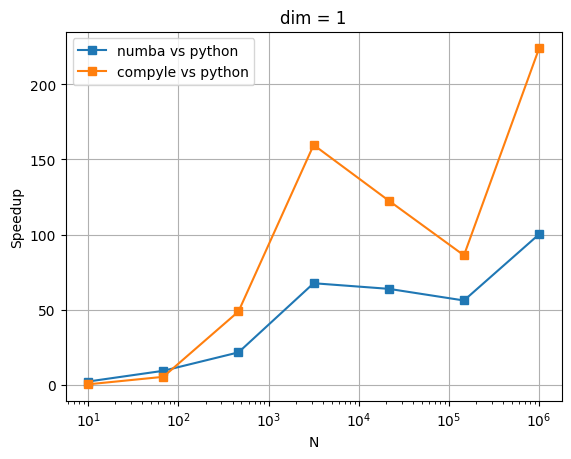

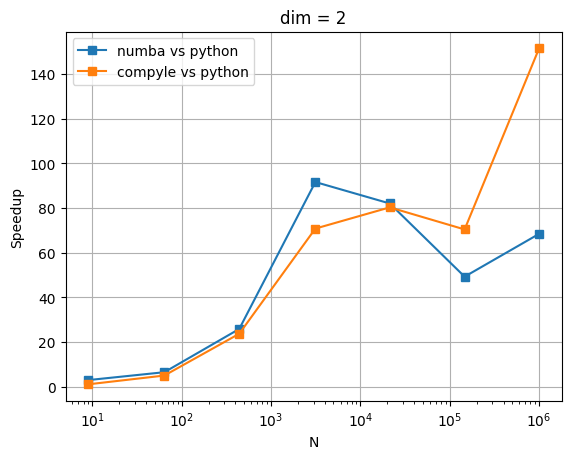

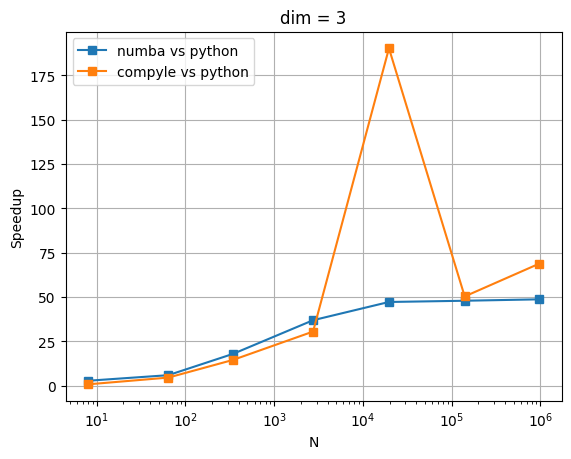

In [11]:
def plot_speedup():
    plt.figure()
    EPS = 1e-50
    for dim in [1, 2, 3]:
        print(f"dim = {dim}")
        time_python, time_numba, time_compyle = [], [], []
        N_list = np.logspace(1, 6, 7)
        nx_list = np.power(N_list, 1./dim).astype(int)
        for idx, nx in enumerate(nx_list):
            if N_list[idx] > 1e4:
                N_iter = 1
            else:
                N_iter = 3
            es_ob = EnergySpectrum.from_example(
                dim=dim, nx=nx, custom_formula=None
            )
            time_python.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='python'), number=N_iter
                ) / N_iter
            )
            time_numba.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='numba'), number=N_iter
                ) / N_iter
            )
            time_compyle.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='compyle'), number=N_iter
                ) / N_iter
            )
            
            # Print % completion
            print(f"{idx+1}/{len(nx_list)} | nx = {nx} ", end='\r')
        
        time_python = np.array(time_python) + EPS
        time_numba = np.array(time_numba) + EPS
        time_compyle = np.array(time_compyle) + EPS
        
        # print(f"time_python = {time_python}")
        # print(f"time_numba = {time_numba}")
        # print(f"time_compyle = {time_compyle}")

        speedup_numba = time_python / time_numba
        speedup_compyle = time_python / time_compyle
        marker_dict = {1: 'o', 2: '^', 3: 's'}
        marker_dict = {1: 's', 2: 's', 3: 's'}

        plt.figure()
        plt.title(f"dim = {dim}")
        plt.semilogx(
            nx_list**dim, speedup_numba, label=f'numba vs python',
            marker=marker_dict[dim]
        )
        plt.semilogx(
            nx_list**dim, speedup_compyle, label=f'compyle vs python',
            marker=marker_dict[dim]
        )
        plt.legend()
        plt.xlabel('N')
        plt.ylabel('Speedup');
        plt.grid()
        fname = f"espec_speedup_dim_{dim}.png"
        plt.savefig(fname, dpi=300)

plot_speedup()